In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('Summary_of_Weather.csv', low_memory=False)

In [6]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

In [9]:
df.isna().sum().sum()

1834179

In [14]:
df.fillna(0,inplace = True)

In [15]:
df.isna().sum().sum()

0

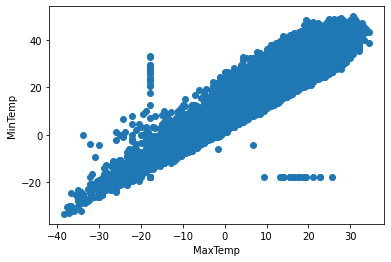

In [16]:
plt.scatter(df['MinTemp'],df['MaxTemp'])
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.show()

In [17]:
df['MaxTemp'].isna().sum()

0

In [18]:
df['MinTemp'].isna().sum()

0

In [38]:
X = df['MaxTemp'].values
Y = df['MinTemp'].values
print(X.shape)
print(Y.shape)

(119040,)
(119040,)


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [41]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(89280, 1)
(29760, 1)
(89280,)
(29760,)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred = model.predict(x_test)

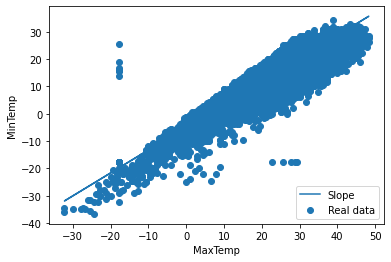

In [49]:
#checking the linear slope
plt.plot(x_test, y_pred, label="Slope")
plt.scatter(x_test, y_test, label="Real data")
plt.xlabel("MaxTemp")
plt.ylabel("MinTemp")
plt.legend()
plt.show()

In [51]:
model.predict(np.array(-30).reshape(-1, 1))

array([-30.06293734])

In [58]:
model.predict(np.array(19).reshape(-1, 1))

array([11.05599803])

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 16.126562566974098
R-squared: 0.7701967649436585
